In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
data = pd.read_csv("Pima Indian Diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Aplying Standardization to all features
from sklearn.preprocessing import StandardScaler
Y = data.Outcome
X = data.drop("Outcome", axis = 1)
columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
X_std.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [44]:
# Train and Test split of the features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.15, random_state = 5)

In [45]:
#Building Logistic Regression model on the Standardized variables
from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression()
lr_std.fit(x_train, y_train)
y_pred = lr_std.predict(x_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(x_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.82


In [46]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = columns)
X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [51]:
# Train and Test split of Normalized features
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X_norm, Y, test_size = 0.15, random_state = 5)

In [52]:
#Building Logistic Regression model on the Normalized variables
from sklearn.linear_model import LogisticRegression
lr_norm = LogisticRegression()
lr_norm.fit(x1_train, y1_train)
y_pred = lr_norm.predict(x1_test)
print('Accuracy of logistic regression on test set with Normalized features: {:.2f}'.format(lr_norm.score(x1_test, y1_test)))

Accuracy of logistic regression on test set with Normalized features: 0.81


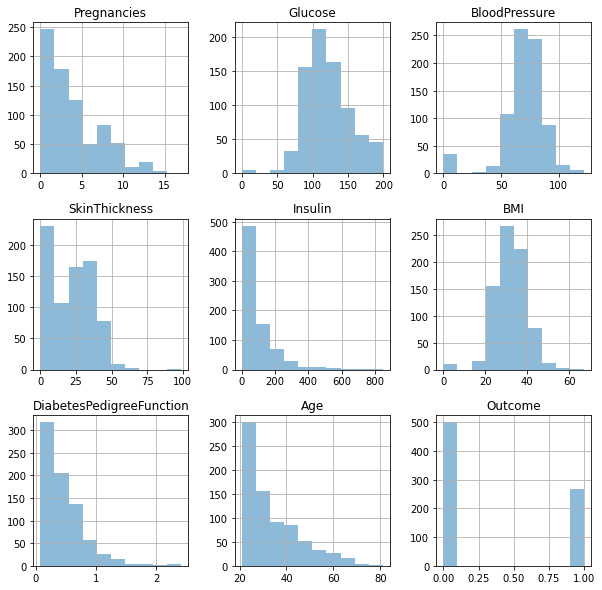

In [53]:
# Plotting the histograms of each variable
from matplotlib import pyplot
data.hist(alpha=0.5, figsize=(10, 10))
pyplot.show()

In [55]:

#Initializing Gaussian and Non-Gaussian features based on distributions
# Standardizing - Gaussian Distribution features
# Normalizing - Non-Gaussian Distribution features
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
Standardize_Var = ['BMI','BloodPressure', 'Glucose']
Standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])
Normalize_Var = ['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']
Normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])







In [56]:




x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.2)
preprocessor = ColumnTransformer(transformers=
        [('standard', Standardize_transformer, Standardize_Var),
        ('norm', Normalize_transformer, Normalize_Var)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])
clf.fit(x2_train, y2_train)
print('Accuracy of Logistic Regression model after standardizing Gaussian distributed features and normalizing Non-Gaussian distributed features: {:.2f}'.format(clf.score(x2_test, y2_test)))



Accuracy of Logistic Regression model after standardizing Gaussian distributed features and normalizing Non-Gaussian distributed features: 0.75
